In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Data 240/Group/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Data 240/Group/test.csv")

In [ ]:
train_data

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,gears of war,2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,Gears of war,2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,Gears of war,2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,Assassin creed,2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,dead island,2011-09-11 15:15:34.336,2011-09-11 15:15:26.206
...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,Modern warfare 3,2011-09-27 22:53:29.344,2011-09-27 22:53:04.644
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,Batman,2011-10-14 12:44:14.669,2011-10-14 12:44:07.004
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,Batman,2011-10-14 12:44:31.228,2011-10-14 12:44:07.004
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,360 games,2011-10-10 08:46:10.368,2011-10-10 08:43:56.768


In [ ]:
for item in train_data['sku']:
  if len(str(item)) > 7:
    print(item)

9999169100050027


In [ ]:
ss = train_data["query"].value_counts()

In [ ]:
print(ss[0:20])

Gears of war 3        1471
Dead island           1350
Battlefield 3         1012
dead island            911
gears of war 3         877
Batman                 709
Gears of war           685
Modern warfare 3       682
Rocksmith              665
Forza 4                648
battlefield 3          590
rocksmith              502
gears of war           496
xbox 360               463
Batman arkham city     445
Mw3                    431
batman                 416
forza 4                398
Call of duty           376
call of duty           367
Name: query, dtype: int64


In [ ]:
import re
train_data['query'] = [re.findall(r'\w+', i.lower()) for i in train_data['query'].fillna('NONE')]

In [ ]:
train_data

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,"[gears, of, war]",2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,"[gears, of, war]",2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,"[gears, of, war]",2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,"[assassin, creed]",2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,"[dead, island]",2011-09-11 15:15:34.336,2011-09-11 15:15:26.206
...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,"[modern, warfare, 3]",2011-09-27 22:53:29.344,2011-09-27 22:53:04.644
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,[batman],2011-10-14 12:44:14.669,2011-10-14 12:44:07.004
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,[batman],2011-10-14 12:44:31.228,2011-10-14 12:44:07.004
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,"[360, games]",2011-10-10 08:46:10.368,2011-10-10 08:43:56.768


In [ ]:
train_data["query"].value_counts()[0:50]

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[gears, of, war, 3]                     2428
[dead, island]                          2329
[battlefield, 3]                        1607
[gears, of, war]                        1204
[rocksmith]                             1170
[batman]                                1127
[forza, 4]                              1053
[modern, warfare, 3]                    1032
[batman, arkham, city]                   851
[xbox, 360]                              824
[call, of, duty]                         755
[mw3]                                    742
[fifa, 12]                               606
[forza]                                  576
[nba, 2k12]                              574
[madden, 12]                             521
[arkham, city]                           464
[battlefield]                            429
[rage]                                   423
[xbox]                                   396
[halo]                                   369
[skyrim]                                 354
[nhl, 12] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Clicks')

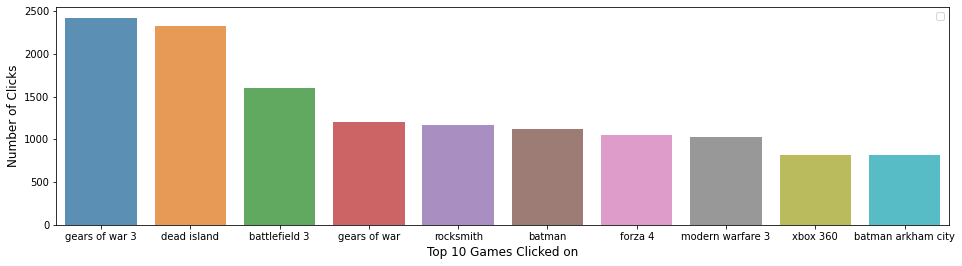

In [ ]:
sizes_train = train_data["query"].value_counts()[0:10]
#sizes_train = sizes_train / np.sum(sizes_train)

plt.figure(figsize=(16,4))
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.8)
plt.legend()
plt.xlabel('Top 10 Games Clicked on', fontsize=12)
plt.ylabel('Number of Clicks', fontsize=12)

In [ ]:
type(train_data["click_time"][0])

str

In [ ]:
train_data["click_time"] = pd.to_datetime(train_data["click_time"],
errors = 'coerce')

In [ ]:
#train_data["query_time"] = pd.to_datetime(train_data["query_time"],
#errors = 'coerce')

In [ ]:
train_data

,user,sku,category,query,click_time,query_time
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,"[gears, of, war]",2011-10-09 17:22:56.101,2011-10-09 17:21:42.917
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,"[gears, of, war]",2011-09-25 13:35:42.198,2011-09-25 13:35:33.234
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,"[gears, of, war]",2011-09-25 13:36:08.668,2011-09-25 13:35:33.234
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,"[assassin, creed]",2011-09-25 13:37:23.709,2011-09-25 13:37:00.049
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,"[dead, island]",2011-09-11 15:15:34.336,2011-09-11 15:15:26.206
...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,"[modern, warfare, 3]",2011-09-27 22:53:29.344,2011-09-27 22:53:04.644
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,[batman],2011-10-14 12:44:14.669,2011-10-14 12:44:07.004
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,[batman],2011-10-14 12:44:31.228,2011-10-14 12:44:07.004
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,"[360, games]",2011-10-10 08:46:10.368,2011-10-10 08:43:56.768


In [ ]:
train_data['click_time_year'] = train_data["click_time"].dt.year
train_data['click_time_month'] = train_data["click_time"].dt.month
train_data['click_time_day'] = train_data["click_time"].dt.day
train_data['click_time_hour'] = train_data["click_time"].dt.hour
#train_data['click_time_minute'] = train_data["click_time"].dt.minute

In [ ]:
#train_data['query_time_year'] = train_data["query_time"].dt.year
#train_data['query_time_month'] = train_data["query_time"].dt.month
#train_data['query_time_day'] = train_data["query_time"].dt.day
#train_data['query_time_hour'] = train_data["query_time"].dt.hour

In [ ]:
train_data

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_day,click_time_hour
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,"[gears, of, war]",2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,9,17
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,"[gears, of, war]",2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,25,13
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,"[gears, of, war]",2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,25,13
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,"[assassin, creed]",2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,25,13
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,"[dead, island]",2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,11,15
...,...,...,...,...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,"[modern, warfare, 3]",2011-09-27 22:53:29.344,2011-09-27 22:53:04.644,2011,9,27,22
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,[batman],2011-10-14 12:44:14.669,2011-10-14 12:44:07.004,2011,10,14,12
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,[batman],2011-10-14 12:44:31.228,2011-10-14 12:44:07.004,2011,10,14,12
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,"[360, games]",2011-10-10 08:46:10.368,2011-10-10 08:43:56.768,2011,10,10,8


In [ ]:
train_data["click_time_hour"].value_counts()

23    2884
22    2693
18    2588
16    2572
17    2544
15    2472
13    2397
12    2348
14    2348
20    2323
21    2290
19    2220
11    2115
0     1974
10    1818
9     1645
8     1307
7      821
1      781
2      567
6      560
3      411
5      364
4      323
Name: click_time_hour, dtype: int64

In [ ]:
corr_matrix = train_data.corr()

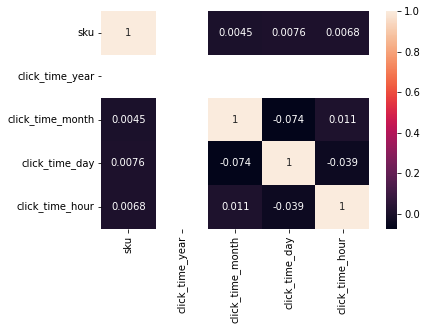

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')
new_titles_sub = []
for title_sub in train_data['query']:
    new_title_sub = []
    for w_title in title_sub:
        if w_title not in stopwords_eng and not w_title.isdigit():
            new_title_sub.append(w_title)

    new_titles_sub.append(new_title_sub)

train_data['new_query'] = new_titles_sub

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.download('wordnet')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
new_titles_sub = []
for title_sub in train_data['new_query']:
    new_title_sub = []
    for w_title in title_sub:
        new_title_sub.append(wordnet_lemmatizer.lemmatize(w_title, pos="v"))
    new_titles_sub.append(new_title_sub)

train_data['new_query'] = new_titles_sub
train_data['new_query'] = [' '.join(i) for i in train_data['new_query']]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
train_data

,user,sku,category,query,click_time,query_time,click_time_year,click_time_month,click_time_day,click_time_hour,new_query
0,0001cd0d10bbc585c9ba287c963e00873d4c0bfd,2032076,abcat0701002,"[gears, of, war]",2011-10-09 17:22:56.101,2011-10-09 17:21:42.917,2011,10,9,17,gear war
1,00033dbced6acd3626c4b56ff5c55b8d69911681,9854804,abcat0701002,"[gears, of, war]",2011-09-25 13:35:42.198,2011-09-25 13:35:33.234,2011,9,25,13,gear war
2,00033dbced6acd3626c4b56ff5c55b8d69911681,2670133,abcat0701002,"[gears, of, war]",2011-09-25 13:36:08.668,2011-09-25 13:35:33.234,2011,9,25,13,gear war
3,00033dbced6acd3626c4b56ff5c55b8d69911681,9984142,abcat0701002,"[assassin, creed]",2011-09-25 13:37:23.709,2011-09-25 13:37:00.049,2011,9,25,13,assassin creed
4,0007756f015345450f7be1df33695421466b7ce4,2541184,abcat0701002,"[dead, island]",2011-09-11 15:15:34.336,2011-09-11 15:15:26.206,2011,9,11,15,dead island
...,...,...,...,...,...,...,...,...,...,...,...
42360,fff95d849a4d9c9946e081459471adf4a7192d79,2670133,abcat0701002,"[modern, warfare, 3]",2011-09-27 22:53:29.344,2011-09-27 22:53:04.644,2011,9,27,22,modern warfare
42361,fffa393d127dec90b7eae4718535bd16be3b394d,2173065,abcat0701002,[batman],2011-10-14 12:44:14.669,2011-10-14 12:44:07.004,2011,10,14,12,batman
42362,fffa393d127dec90b7eae4718535bd16be3b394d,3046603,abcat0701002,[batman],2011-10-14 12:44:31.228,2011-10-14 12:44:07.004,2011,10,14,12,batman
42363,fffd288ec29a96dbac7356bcda0a1e9f88255a5b,2340293,abcat0701002,"[360, games]",2011-10-10 08:46:10.368,2011-10-10 08:43:56.768,2011,10,10,8,game


#Testing Model with different Features

In [ ]:
#half_df = train_data.sample(frac=0.01)

In [ ]:
X = train_data.drop(['user', 'sku', 'category', 'query_time', 'click_time', 'click_time_year', 'query'],axis=1)
y = train_data['sku']

In [ ]:
X = train_data[['click_time_month' , 'sku']].iloc[: , :].values
y = train_data['sku']

In [ ]:
train_data.iloc[:, 8]

0         9
1        25
2        25
3        25
4        11
         ..
42360    27
42361    14
42362    14
42363    10
42364     4
Name: click_time_day, Length: 42365, dtype: int64

In [ ]:
X.head(10)

,click_time_month,click_time_day,click_time_hour,new_query
0,10,9,17,gear war
1,9,25,13,gear war
2,9,25,13,gear war
3,9,25,13,assassin creed
4,9,11,15,dead island
5,10,25,20,rocksmith
6,10,29,20,nba n2k
7,8,12,18,call duty
8,10,7,0,rock band
9,9,30,8,xbox


In [ ]:
n = len(pd.unique(y))

print("No.of.unique values :",
      n)

No.of.unique values : 413


In [ ]:
print(len(y))
print('-----------')
print(y)




42365
-----------
0        2032076
1        9854804
2        2670133
3        9984142
4        2541184
          ...   
42360    2670133
42361    2173065
42362    3046603
42363    2340293
42364    2953607
Name: sku, Length: 42365, dtype: int64


In [ ]:
#from datetime import datetime

#X.click_time = X[['click_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')
#X.query_time = X[['query_time']].transform(lambda x: x + '.' + '0' * 6 if len(x) == 19  else x + (26 - len(x)) * '0')

#X = X.transform({'query': (lambda x: x.lower()), 'click_time':(lambda time: int(''.join(c for c in time if c.isdigit()))), \
                #'query_time': (lambda time: int(''.join(c for c in time if c.isdigit())))})

In [ ]:
#query_type = X['query'].unique()
#query_size = X['query'].nunique()
#query_dict = {query_type[i]: i for i in range(query_size)}
#query_dict['ncaa 2011']

In [ ]:
#X = X.transform({'query': (lambda x: query_dict[x]), 'click_time': (lambda x: x), 'query_time' : (lambda x: x)})

In [ ]:
le = preprocessing.LabelEncoder()
X['new_query'] = le.fit_transform(X['new_query'].values)

In [ ]:
X

array([[     10, 2032076],
       [      9, 9854804],
       [      9, 2670133],
       ...,
       [     10, 3046603],
       [     10, 2340293],
       [     10, 2953607]])

## Test Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

## Test Vetorized in DIfferent Ways


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def dummy(tokens):
    return tokens

vectorizer = TfidfVectorizer(tokenizer=dummy, preprocessor=dummy)
Xx = vectorizer.fit_transform(X_train['new_query'].values)
Xy = vectorizer.fit_transform(X_test['new_query'].values)
features = pd.DataFrame(Xx.todense(), columns=vectorizer.get_feature_names())
labels = pd.DataFrame(Xy.todense(), columns=vectorizer.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
features

,,0,1,2,3,4,5,6,7,8,...,q,r,s,t,u,v,w,x,y,z
0,0.157826,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.341774,0.000000,0.196230,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.775349,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.490093,0.000000,0.0,0.000000
2,0.174144,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.377111,0.248491,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.705005,0.0,0.000000
4,0.156332,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.223075,0.000000,0.0,0.0,0.000000,0.632755,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29650,0.260838,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.564846,0.000000,0.000000,0.0,0.0,0.423924,0.000000,0.0,0.000000
29651,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.313117,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.716551
29652,0.260838,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.564846,0.000000,0.000000,0.0,0.0,0.423924,0.000000,0.0,0.000000
29653,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.376103,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [ ]:
X_train = (X_train.join(features)).drop(['new_query'],axis=1)
X_test = (X_test.join(labels)).drop(['new_query'],axis=1)

In [ ]:
X_train

,click_time_month,click_time_day,click_time_hour,,0,1,2,3,4,5,...,q,r,s,t,u,v,w,x,y,z
0,10,18,17,0.157826,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.341774,0.000000,0.196230,0.0,0.0,0.000000,0.000000,0.0,0.000000
1,10,1,13,0.000000,0.0,0.0,0.0,0.775349,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.490093,0.000000,0.0,0.000000
2,9,8,16,0.174144,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.377111,0.248491,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
3,10,24,11,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.705005,0.0,0.000000
4,9,14,0,0.156332,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.223075,0.000000,0.0,0.0,0.000000,0.632755,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29650,9,20,13,0.260838,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.564846,0.000000,0.000000,0.0,0.0,0.423924,0.000000,0.0,0.000000
29651,10,11,6,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.313117,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.716551
29652,8,17,3,0.260838,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.564846,0.000000,0.000000,0.0,0.0,0.423924,0.000000,0.0,0.000000
29653,9,8,11,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.376103,0.0,0.0,0.000000,0.000000,0.0,0.000000


In [ ]:
X_test

,click_time_month,click_time_day,click_time_hour,,0,1,2,3,4,5,...,q,r,s,t,u,v,w,x,y,z
12528,10,16,19,0.381177,0.00000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.205076,0.272125,0.000000,0.392529,0.501702,0.000000,0.0,0.00000,0.000000
3617,10,9,11,0.260839,0.00000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.561335,0.000000,0.000000,0.000000,0.000000,0.424306,0.0,0.00000,0.000000
7950,10,18,20,0.000000,0.64889,0.580946,0.193208,0.187440,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118069,0.0,0.00000,0.000000
7876,10,2,7,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.310820,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.720935
2000,9,17,16,0.218361,0.00000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,9,14,12,0.000000,0.00000,0.000000,0.000000,0.774411,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
3496,9,19,20,0.160137,0.00000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.344620,0.228646,0.000000,0.000000,0.421542,0.000000,0.0,0.31825,0.000000
2449,10,6,17,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000
4524,8,30,12,0.231683,0.00000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.249295,0.330801,0.286377,0.000000,0.000000,0.000000,0.0,0.00000,0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=20)

In [ ]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
clf_rf.score(X_test, y_test)

0.6018882769472856

In [ ]:
y_pred = clf_rf.predict(X_test)

In [ ]:
parameters = {'max_depth':range(9, 20, 2), 'min_samples_leaf': range(30, 101, 20), \
             'min_samples_split':range(10, 101, 10)}
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=20),
             param_grid={'max_depth': range(9, 20, 2),
                         'min_samples_leaf': range(30, 101, 20),
                         'min_samples_split': range(10, 101, 10)})

In [ ]:
grid_search_cv_clf.best_estimator_

RandomForestClassifier(max_depth=19, min_samples_leaf=30, min_samples_split=50,
                       n_estimators=20)

In [ ]:
best_clf = grid_search_cv_clf.best_estimator_

In [ ]:
y_pred = best_clf.predict(X_test)

In [ ]:
best_clf.score(X_test, y_test)

0.6027537372147915

In [ ]:
prob = clf_rf.predict_proba(X_test)

In [ ]:
train_sku = y_train.unique()

In [ ]:
train_sku = list(train_sku)

In [ ]:
train_sku.sort()

In [ ]:
pred_df = pd.DataFrame(prob, columns = train_sku)

In [ ]:
pred_df = pred_df.transpose()

In [ ]:
test_labels = [str(i) for i in y_test]

In [ ]:
pred_df.columns = test_labels

In [ ]:
y = y.reset_index(drop=True)

In [ ]:
y

0           2032076
1           9854804
2           2670133
3           9984142
4           2541184
             ...   
42361       2173065
42362       3046603
42363       2340293
42364       2953607
top5_SKU           
Name: sku, Length: 42366, dtype: object

In [ ]:
y.columns =['sku']

# displaying the DataFrame
print(y)

0           2032076
1           9854804
2           2670133
3           9984142
4           2541184
             ...   
42361       2173065
42362       3046603
42363       2340293
42364       2953607
top5_SKU           
Name: sku, Length: 42366, dtype: object


In [ ]:
y['top5_SKU'] = ""

In [ ]:
y['top5_SKU'] = ""
# pred_df.iloc[:,[1]]
for i in range(0,len(y['sku']) - 1):
    s1 = y['sku'][i]
    d = pred_df.iloc[:,[i]]
    top5 = d.nlargest(5,d.columns[0])
    x = list(top5.index)
    y['top5_SKU'][i] = x

In [ ]:
output = pd.DataFrame({'Sku': y_pred})
output.to_csv("/content/drive/MyDrive/Data 240/Group/predict.csv")

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
n = len(pd.unique(y_pred))

print("No.of.unique values :",
      n)

In [ ]:
y_pred

# Display Values of the click_time column

In [ ]:
X['query'].value_counts()

In [ ]:
train_data['sku'].value_counts()

In [ ]:
train_data

In [ ]:
train_data["click_time_month"].value_counts()

In [ ]:
months_train = train_data["click_time_month"].value_counts()
#sizes_train = sizes_train / np.sum(sizes_train)

plt.figure(figsize=(16,4))
sns.barplot(months_train.index, months_train.values, alpha=0.8)
plt.legend()
plt.xlabel('Months', fontsize=12)
plt.ylabel('Occurence', fontsize=12)

In [ ]:
days_train = train_data["click_time_day"].value_counts()
#sizes_train = sizes_train / np.sum(sizes_train)

plt.figure(figsize=(16,4))
sns.barplot(days_train.index, days_train.values, alpha=0.8)
plt.legend()
plt.xlabel('Days', fontsize=12)
plt.ylabel('Occurence', fontsize=12)

In [ ]:
hours_train = train_data["click_time_hour"].value_counts()
#sizes_train = sizes_train / np.sum(sizes_train)

plt.figure(figsize=(16,4))
sns.barplot(hours_train.index, hours_train.values, alpha=0.8)
plt.legend()
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Occurence', fontsize=12)

In [ ]:
train_data["sku"].value_counts()

#Attempt on DBSCAN

In [ ]:
df = X.copy()

In [ ]:
test = new_df.loc[:, ['query',
                 'click_time_day']].values

In [ ]:
print(test.shape)

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 4, min_samples = 4).fit(test) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
from matplotlib.pyplot import figure

In [ ]:
# Plot the clusters
plt.figure(figsize=(20, 8), dpi=80)
plt.scatter(test[:, 0], test[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

In [ ]:
n = 5
top_5 = X['query'].value_counts()[:n].index.tolist()

In [ ]:
top_5

In [ ]:
new_df = X.loc[df['query'].isin(top_5)]

In [ ]:
new_df

In [ ]:
new_df["query"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=20)

In [ ]:
clf_rf.fit(X_train, y_train)

In [ ]:
clf_rf.score(X_test, y_test)